In [1]:
import tensorflow as tf

In [2]:
w = [[1,2,3],[4,5,6],[7,8,9]]
x = [[1],[2],[3]]

W = tf.Variable(w, tf.int32)
X = tf.Variable(x, tf.int32)


y = tf.matmul(W,X)
print (y)

Tensor("MatMul:0", shape=(3, 1), dtype=int32)


In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run(y)
print (result)

[[14]
 [32]
 [50]]


In [4]:
w = [[1,2,3],[4,5,6],[7,8,9]]
x0 = [[1],[2],[3]]
x1 = [[0],[0],[0]]
x2 = [[1],[1],[1]]
vectors =[x0,x1,x2]

W = tf.Variable(w, tf.int32)
x_ph = tf.placeholder(tf.int32, [3,1])

y2 = tf.matmul(W, x_ph)

result_list = []
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    for v in vectors:
        result_list.append(sess2.run(y2,feed_dict={x_ph: v}))

print ("{},{},{}".format(*result_list))

[[14]
 [32]
 [50]],[[0]
 [0]
 [0]],[[ 6]
 [15]
 [24]]


### 学習内容 ###
- ねこ　ー＞　にゃーん
- いぬ　ー＞　わんわん
- うさぎ　ー＞　・・・。

を学習させる。


In [55]:
cat = [[1.],[0.],[0.]]
dog = [[0.],[1.],[0.]]
rabbit= [[0.],[0.],[1.]]

nyan =  [[1.],[0.],[0.]]
wan =  [[0.],[1.],[0.]]
silent = [[0.],[0.],[1.]]

data_set = [(cat,nyan),(dog,wan),(rabbit, silent)]

import random
random.shuffle(data_set)
len(data_set)

3

In [56]:
w = [[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]]

W = tf.Variable(w, tf.float32)
x = tf.placeholder(tf.float32, [3,1])

y = tf.matmul(W,x)
y_ = tf.placeholder(tf.float32, [3,1])

cost = tf.reduce_sum(tf.pow(y - y_ , 2))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

step_num = 600

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for j in range(step_num):
        for i in range(len(data_set)):
            sess.run(train_step, feed_dict={x: data_set[i][0], y_: data_set[i][1]})
        if j % 100 == 0:
            error = sess.run(cost,feed_dict={x: data_set[i][0], y_: data_set[i][1]})
            print ("{}回目の損失関数の値: {}".format(j,error))
            print ("w=",sess.run(W))
            print (" ")
    w_result = sess.run(W)


0回目の損失関数の値: 0.9604000449180603
w= [[ 0.02  0.    0.  ]
 [ 0.    0.02  0.  ]
 [ 0.    0.    0.02]]
 
100回目の損失関数の値: 0.0168914757668972
w= [[ 0.87003279  0.          0.        ]
 [ 0.          0.87003279  0.        ]
 [ 0.          0.          0.87003279]]
 
200回目の損失関数の値: 0.0002970856730826199
w= [[ 0.98276383  0.          0.        ]
 [ 0.          0.98276383  0.        ]
 [ 0.          0.          0.98276383]]
 
300回目の損失関数の値: 5.224510914558778e-06
w= [[ 0.99771428  0.          0.        ]
 [ 0.          0.99771428  0.        ]
 [ 0.          0.          0.99771428]]
 
400回目の損失関数の値: 9.18633134006086e-08
w= [[ 0.99969691  0.          0.        ]
 [ 0.          0.99969691  0.        ]
 [ 0.          0.          0.99969691]]
 
500回目の損失関数の値: 1.6139125591507764e-09
w= [[ 0.99995983  0.          0.        ]
 [ 0.          0.99995983  0.        ]
 [ 0.          0.          0.99995983]]
 


In [57]:
import numpy as np

np.dot(w_result, cat)

array([[ 0.99999452],
       [ 0.        ],
       [ 0.        ]])

In [58]:
np.dot(w_result, dog)

array([[ 0.        ],
       [ 0.99999452],
       [ 0.        ]])

In [59]:
np.dot(w_result, rabbit)

array([[ 0.        ],
       [ 0.        ],
       [ 0.99999452]])

In [60]:
print(w_result)

[[ 0.99999452  0.          0.        ]
 [ 0.          0.99999452  0.        ]
 [ 0.          0.          0.99999452]]


### 学習内容 ###
- サイン　ー＞　sin関数の図を出す
- コサイン　ー＞　cos関数の図を出す
- タンジェント　ー＞　tan関数の図を出す

を学習させる。（正確には三角関数に対応する400次元ベクトルを求めさせる。）

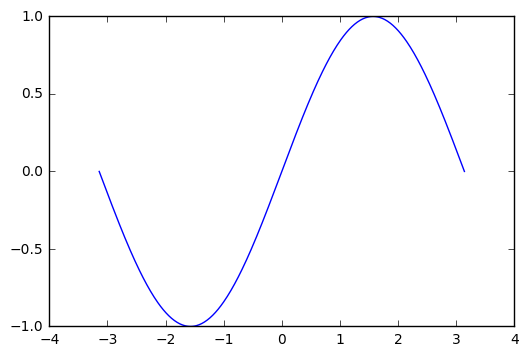

In [14]:
%matplotlib inline
import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 400)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [15]:
import random
import numpy as np
x_data = np.linspace(-np.pi, np.pi, 400)

sin = [[1.],[0.],[0.]]
cos = [[0.],[1.],[0.]]
tan = [[0.],[0.],[1.]]


sin_r = np.reshape(np.sin(x_data),(400,1))
cos_r = np.reshape(np.cos(x_data),(400,1))
tan_r = np.reshape(np.tan(x_data),(400,1))

data_set = [(sin, sin_r)]*500 +[(cos ,cos_r)]*500 + [(tan, tan_r)]*500
random.shuffle(data_set)

In [17]:
w = tf.zeros([400,3])
W = tf.Variable(w, "float")
x = tf.placeholder(tf.float32, [3,1])
y = tf.matmul(W,x)
y_ = tf.placeholder(tf.float32, [400,1])

cost = tf.reduce_sum(tf.pow(y - y_, 2))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(len(data_set)):
        sess.run(train_step, feed_dict={x: data_set[i][0], y_: data_set[i][1]})
        if i % 100 == 0:
            error = sess.run(cost,feed_dict={x: data_set[i][0], y_: data_set[i][1]})
            print ("{}回目のエラー関数の値: {}".format(i,error))
    w_result = sess.run(W)

0回目のエラー関数の値: 152513.4375
100回目のエラー関数の値: 37079.453125
200回目のエラー関数の値: 11488.0390625
300回目のエラー関数の値: 4.471416473388672
400回目のエラー関数の値: 1.1319268941879272
500回目のエラー関数の値: 0.15086816251277924
600回目のエラー関数の値: 0.08188572525978088
700回目のエラー関数の値: 0.024365335702896118
800回目のエラー関数の値: 0.0046484628692269325
900回目のエラー関数の値: 0.0006717231590300798
1000回目のエラー関数の値: 0.21008586883544922
1100回目のエラー関数の値: 0.00011761337373172864
1200回目のエラー関数の値: 0.012924641370773315
1300回目のエラー関数の値: 0.0035466498229652643
1400回目のエラー関数の値: 1.3812665429213666e-06


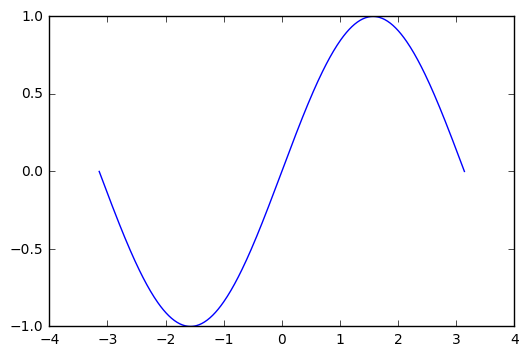

In [18]:
input =  [[1.0],[.0],[.0]]
y_r = np.dot(w_result, input).flatten()
plt.plot(x_data, y_r)
plt.show()

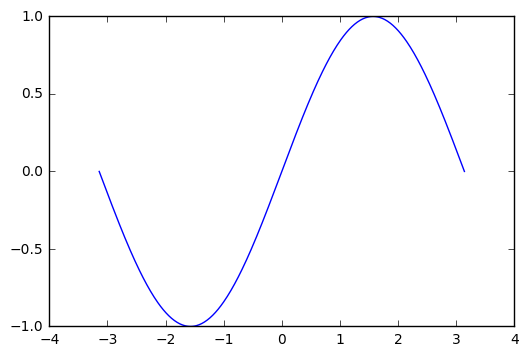

In [19]:
plt.plot(x_data, np.sin(x_data))
plt.show()

## 学習内容 ##
n = 0,1,2,...100  
sin(nx)  
cos(nx)  
を[-π, π]区間を1000分割した配列　ー＞　三角関数を特定  
cos(0) = [1,0,0,0,....,0]  
sin(0) = [0,1,0,0,....,0]  
cos(x) = [0,0,1,0,....,0]  
sin(x) = [0,0,0,1,....,0]  
.  
.  
.  
sin(100x) = [0,0,0,0,....,1]  


In [37]:
import random
import numpy as np
import tensorflow as tf

dim = 1000
base_num = 100
batch_size = 50
x_data = np.linspace(-np.pi, np.pi, dim)

bases = []
data_set =[]
for i in range(base_num):
    zero_v = np.zeros(base_num)
    zero_v[i] = 1.0
    bases.append(zero_v.flatten())
    
for i in range(0, base_num,2):
    sin_r = np.sin(i/2 * x_data).flatten()
    cos_r = np.cos(i/2 * x_data).flatten()
    data_set += [(cos_r, bases[i], "cos({}x)".format(i/2)), (sin_r,bases[i+1],"sin({}x)".format(i/2))] 
data_set = data_set *10000
random.shuffle(data_set)

def make_batch(data_set, size):
    input_list = []
    acc_list = []
    batch = []
    batch_acc = []
    for i in range(len(data_set)):
        batch.append(data_set[i][0])
        batch_acc.append(data_set[i][1])
        if len(batch) == size:
            input_list.append(batch)
            acc_list.append(batch_acc)
            batch = []
            batch_acc = []
    return input_list, acc_list

input_list , acc_list = make_batch(data_set, batch_size)
len(input_list)

20000

In [40]:
hidden_num1 = 1000
hidden_num2 = base_num

y_ = tf.placeholder(tf.float32, [None, base_num])
x = tf.placeholder(tf.float32, [None, dim])

  
weights1 = tf.Variable(tf.truncated_normal([dim, hidden_num1], stddev=0.0001))
biases1 = tf.Variable(tf.ones([hidden_num1]))
hidden_layer_1 = tf.nn.relu(tf.matmul(x, weights1) + biases1)


weights2 = tf.Variable(tf.truncated_normal([hidden_num1, hidden_num2], stddev=0.0001))
biases2 = tf.Variable(tf.ones([hidden_num2]))
y = tf.nn.softmax(tf.matmul(hidden_layer_1, weights2) + biases2)


cost = -tf.reduce_sum(y_ * tf.log(tf.clip_by_value(y,1e-1000, 1.0)))
train_step = tf.train.AdamOptimizer(0.0001).minimize(cost)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
for index, (inp,acc) in enumerate(zip(input_list, acc_list)):
    feed_dict={x: inp, y_: acc}
    sess.run([train_step], feed_dict=feed_dict)
    if  index % 1000 == 0:
        error = sess.run(cost, feed_dict=feed_dict)
        print ("{}回目のエラー関数の値: {}".format(index, error))

0回目のエラー関数の値: 224.11636352539062
1000回目のエラー関数の値: 1.2238821983337402
2000回目のエラー関数の値: 0.4309583902359009
3000回目のエラー関数の値: 0.04769928380846977
4000回目のエラー関数の値: 0.021627571433782578
5000回目のエラー関数の値: 0.009902756661176682
6000回目のエラー関数の値: 0.004408317618072033
7000回目のエラー関数の値: 0.002349671209231019
8000回目のエラー関数の値: 0.0011626619379967451
9000回目のエラー関数の値: 0.0006625697715207934
10000回目のエラー関数の値: 0.0003021964803338051
11000回目のエラー関数の値: 0.0001837018644437194
12000回目のエラー関数の値: 9.942064207280055e-05
13000回目のエラー関数の値: 0.00021041810396127403
14000回目のエラー関数の値: 3.206730616511777e-05
15000回目のエラー関数の値: 1.573562803969253e-05
16000回目のエラー関数の値: 5.936688830843195e-05
17000回目のエラー関数の値: 2.014647179748863e-05
18000回目のエラー関数の値: 1.1205707778572105e-05
19000回目のエラー関数の値: 4.172333774477011e-06


In [41]:
cos_1_3 = (np.cos(1 * x_data)+np.cos(3*x_data)).flatten()
new_x =[cos_1_3] 
result = sess.run(y,feed_dict={x:new_x})
result

array([[  5.70725281e-12,   1.69063173e-06,   7.98306406e-01,
          5.41417813e-11,   3.03855621e-11,   3.91006338e-10,
          2.01691851e-01,   3.44793444e-10,   7.90387200e-12,
          2.36099390e-10,   1.16868765e-10,   5.09946703e-11,
          2.73611429e-12,   2.14798818e-10,   4.41315994e-12,
          1.81851374e-11,   1.21513161e-10,   4.19906193e-11,
          1.13552563e-10,   1.30842864e-10,   7.39103310e-12,
          1.40810474e-10,   6.68737418e-12,   1.94148225e-10,
          9.07876584e-13,   4.59988381e-10,   1.93654381e-11,
          1.70624598e-10,   1.07777494e-11,   3.44009765e-10,
          2.74809667e-12,   7.34610817e-10,   3.63379118e-11,
          5.77751666e-11,   3.73374005e-11,   1.04651440e-10,
          3.06756738e-11,   3.68734904e-11,   5.48639259e-12,
          5.66396478e-11,   4.12436890e-11,   1.21014948e-10,
          1.25168265e-10,   1.33110178e-09,   2.72567229e-11,
          2.92621843e-10,   1.60330915e-11,   9.76820180e-10,
        

==学習内容==  
リストの最大値の場所を特定する。
```
[86,57,80,12] -> [1,0,0,0]
[8,72,18,23] ->  [0,1,0,0]
```

In [14]:
import numpy as np
input_list = []
correct_list = []
for _ in range(1000):
    d = np.random.randint(0,100,(1,4))
    max_idx = np.argmax(d)
    a = [0,0,0,0]
    a[max_idx] = 1
    input_list.append(d)
    correct_list.append([a])

print("head of data")
for i,(inp,corr) in enumerate(zip(input_list,correct_list)):
    print(inp,corr)
    if(i == 5):
        break
print("==")

test_num = int(len(input_list) * 0.1)

test_input_list = input_list[:test_num]
test_correct_list = correct_list[:test_num]

train_input_list = input_list[test_num:]
train_correct_list = correct_list[test_num:]

print("test data num: ",len(test_input_list))
print("train data num: ",len(train_input_list))


head of data
[[92 80 82 51]] [[1, 0, 0, 0]]
[[51 32 99 14]] [[0, 0, 1, 0]]
[[75 35 30 78]] [[0, 0, 0, 1]]
[[74 79 51 64]] [[0, 1, 0, 0]]
[[51 52 76 88]] [[0, 0, 0, 1]]
[[ 2 59 34 39]] [[0, 1, 0, 0]]
==
test data num:  100
train data num:  900


In [15]:
test_input_list = np.reshape(test_input_list,(len(test_input_list),4))
test_correct_list = np.reshape(test_correct_list,(len(test_input_list),4))
test_input_list.shape

(100, 4)

In [36]:
train_input_list = np.reshape(train_input_list,(len(train_input_list),4))
train_correct_list = np.reshape(train_correct_list,(len(train_correct_list),4))
train_input_list.shape

(900, 4)

In [46]:
import tensorflow as tf
hidden_num1 = 10
hidden_num2 = 2
input_dim = 4

y_ = tf.placeholder(tf.float32, [None, 4])
x = tf.placeholder(tf.float32, [None, input_dim])

weights1 = tf.Variable(tf.truncated_normal([input_dim, hidden_num1], stddev=0.0001))
biases1 = tf.Variable(tf.ones([hidden_num1]))
hidden_layer_1 = tf.nn.relu(tf.matmul(x, weights1) + biases1)

weights2 = tf.Variable(tf.truncated_normal([hidden_num1, hidden_num2], stddev=0.0001))
biases2 = tf.Variable(tf.ones([hidden_num2]))
hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, weights2) + biases2)

weights3 = tf.Variable(tf.truncated_normal([hidden_num2, 4], stddev=0.0001))
biases3 = tf.Variable(tf.ones([4]))
y = tf.nn.softmax(tf.matmul(hidden_layer_2, weights3) + biases3)


cost = -tf.reduce_sum(y_ * tf.log(tf.clip_by_value(y,1e-5, 1.0)))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

train_step = tf.train.AdamOptimizer(0.0001).minimize(cost)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
for index in range(20000):
    feed_dict={x: train_input_list, y_: train_correct_list}
    sess.run(train_step, feed_dict=feed_dict)
    if  index % 2000 == 0:
        test_feed={x: test_input_list, y_: test_correct_list}
        error = sess.run(cost, feed_dict=test_feed)
        print("step - ",index)
        print ("損失関数の値: ",error)
        acc = sess.run(accuracy, feed_dict=test_feed)
        print ("正解率: ",acc)

step -  0
損失関数の値:  138.624
正解率:  0.31
step -  2000
損失関数の値:  109.116
正解率:  0.42
step -  4000
損失関数の値:  56.5546
正解率:  0.79
step -  6000
損失関数の値:  34.324
正解率:  0.89
step -  8000
損失関数の値:  28.6233
正解率:  0.89
step -  10000
損失関数の値:  25.9225
正解率:  0.87
step -  12000
損失関数の値:  19.3553
正解率:  0.92
step -  14000
損失関数の値:  16.3968
正解率:  0.95
step -  16000
損失関数の値:  15.6947
正解率:  0.95
step -  18000
損失関数の値:  14.0192
正解率:  0.96


In [47]:
new_x =  [[86,57,80,12]]   
result = sess.run(y,feed_dict={x:new_x})
result

array([[  9.93223071e-01,   5.27305109e-03,   2.93798054e-22,
          1.50394056e-03]], dtype=float32)

In [49]:
new_x =  [[6,7,70,1]]   
result = sess.run(y,feed_dict={x:new_x})
result

array([[  1.29532808e-07,   4.69848979e-03,   9.95301366e-01,
          1.02851502e-22]], dtype=float32)

In [51]:
new_x =  [[6,70,70,1]]   
result = sess.run(y,feed_dict={x:new_x})
result

array([[  4.96980715e-29,   8.82812023e-01,   1.17187984e-01,
          0.00000000e+00]], dtype=float32)

In [53]:
np.argmax([6,70,70,1])

1